In [36]:
import requests
import pandas as pd
import matplotlib.pyplot as plot
from collections import Counter
from bs4 import BeautifulSoup

In [2]:
web = requests.get('https://www.basketball-reference.com/draft/NBA_2019.html')

In [3]:
content = web.content

In [6]:
soup = BeautifulSoup(content,'html.parser')

In [11]:
html = soup.find(name='div',attrs={'id':'div_stats'})

In [14]:
data = pd.read_html(str(html))[0]

In [15]:
web = requests.get('https://www.basketball-reference.com/awards/roy.html')

In [16]:
content = web.content

In [17]:
soup = BeautifulSoup(content,'html.parser')

In [18]:
html = soup.find(name='div',attrs={'id':'div_roy_NBA'})

In [22]:
roy_history = pd.read_html(str(html))[0]

In [24]:
roy_history.columns=["Season",	"Lg",	"Player",	"Voting"	,"Age",	"Tm"	,"G"	,"MP"	,"PTS"	,"TRB",	"AST"	,"STL"	,"BLK"	,"FG%"	,"3P%",	"FT%","WS","WS/48"]  

In [28]:
roy_00to19 = roy_history.head(19)

In [32]:
roy_00to19['year'] = roy_00to19['Season'].apply(lambda x: int(x.split('-')[1])-1)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
roy_00to19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 19 columns):
Season    19 non-null object
Lg        19 non-null object
Player    19 non-null object
Voting    19 non-null object
Age       19 non-null int64
Tm        19 non-null object
G         19 non-null int64
MP        19 non-null float64
PTS       19 non-null float64
TRB       19 non-null float64
AST       19 non-null float64
STL       19 non-null float64
BLK       19 non-null float64
FG%       19 non-null float64
3P%       19 non-null float64
FT%       19 non-null float64
WS        19 non-null float64
WS/48     19 non-null float64
year      19 non-null int64
dtypes: float64(11), int64(3), object(5)
memory usage: 2.9+ KB


In [43]:
style = plot.style.available

In [46]:
style

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [139]:
roy_00to19['player_season'] = roy_00to19['Player']+' '+roy_00to19['Season']

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
roy_00to19

,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,...,STL,BLK,FG%,3P%,FT%,WS,WS/48,year,player_season,Player_Season
0,2018-19,NBA,Luka Dončić,(V),19,DAL,72,32.2,21.2,7.8,...,1.1,0.3,0.427,0.327,0.713,4.9,0.101,18,Luka Dončić 2018-19,Luka Dončić2018-19
1,2017-18,NBA,Ben Simmons,(V),21,PHI,81,33.7,15.8,8.1,...,1.7,0.9,0.545,0.000,0.560,9.2,0.162,17,Ben Simmons 2017-18,Ben Simmons2017-18
2,2016-17,NBA,Malcolm Brogdon,(V),24,MIL,75,26.4,10.2,2.8,...,1.1,0.2,0.457,0.404,0.865,4.1,0.100,16,Malcolm Brogdon 2016-17,Malcolm Brogdon2016-17
3,2015-16,NBA,Karl-Anthony Towns,(V),20,MIN,82,32.0,18.3,10.5,...,0.7,1.7,0.542,0.341,0.811,8.3,0.151,15,Karl-Anthony Towns 2015-16,Karl-Anthony Towns2015-16
4,2014-15,NBA,Andrew Wiggins,(V),19,MIN,82,36.2,16.9,4.6,...,1.0,0.6,0.437,0.310,0.760,2.1,0.034,14,Andrew Wiggins 2014-15,Andrew Wiggins2014-15
5,2013-14,NBA,Michael Carter-Williams,(V),22,PHI,70,34.5,16.7,6.2,...,1.9,0.6,0.405,0.264,0.703,1.3,0.026,13,Michael Carter-Williams 2013-14,Michael Carter-Williams2013-14
6,2012-13,NBA,Damian Lillard,(V),22,POR,82,38.6,19.0,3.1,...,0.9,0.2,0.429,0.368,0.844,5.8,0.088,12,Damian Lillard 2012-13,Damian Lillard2012-13
7,2011-12,NBA,Kyrie Irving,(V),19,CLE,51,30.5,18.5,3.7,...,1.1,0.4,0.469,0.399,0.872,4.1,0.125,11,Kyrie Irving 2011-12,Kyrie Irving2011-12
8,2010-11,NBA,Blake Griffin,(V),21,LAC,82,38.0,22.5,12.1,...,0.8,0.5,0.506,0.292,0.642,9.8,0.152,10,Blake Griffin 2010-11,Blake Griffin2010-11
9,2009-10,NBA,Tyreke Evans,(V),20,SAC,72,37.2,20.1,5.3,...,1.5,0.4,0.458,0.255,0.748,5.4,0.097,9,Tyreke Evans 2009-10,Tyreke Evans2009-10


In [88]:
plot.style.use('fivethirtyeight')

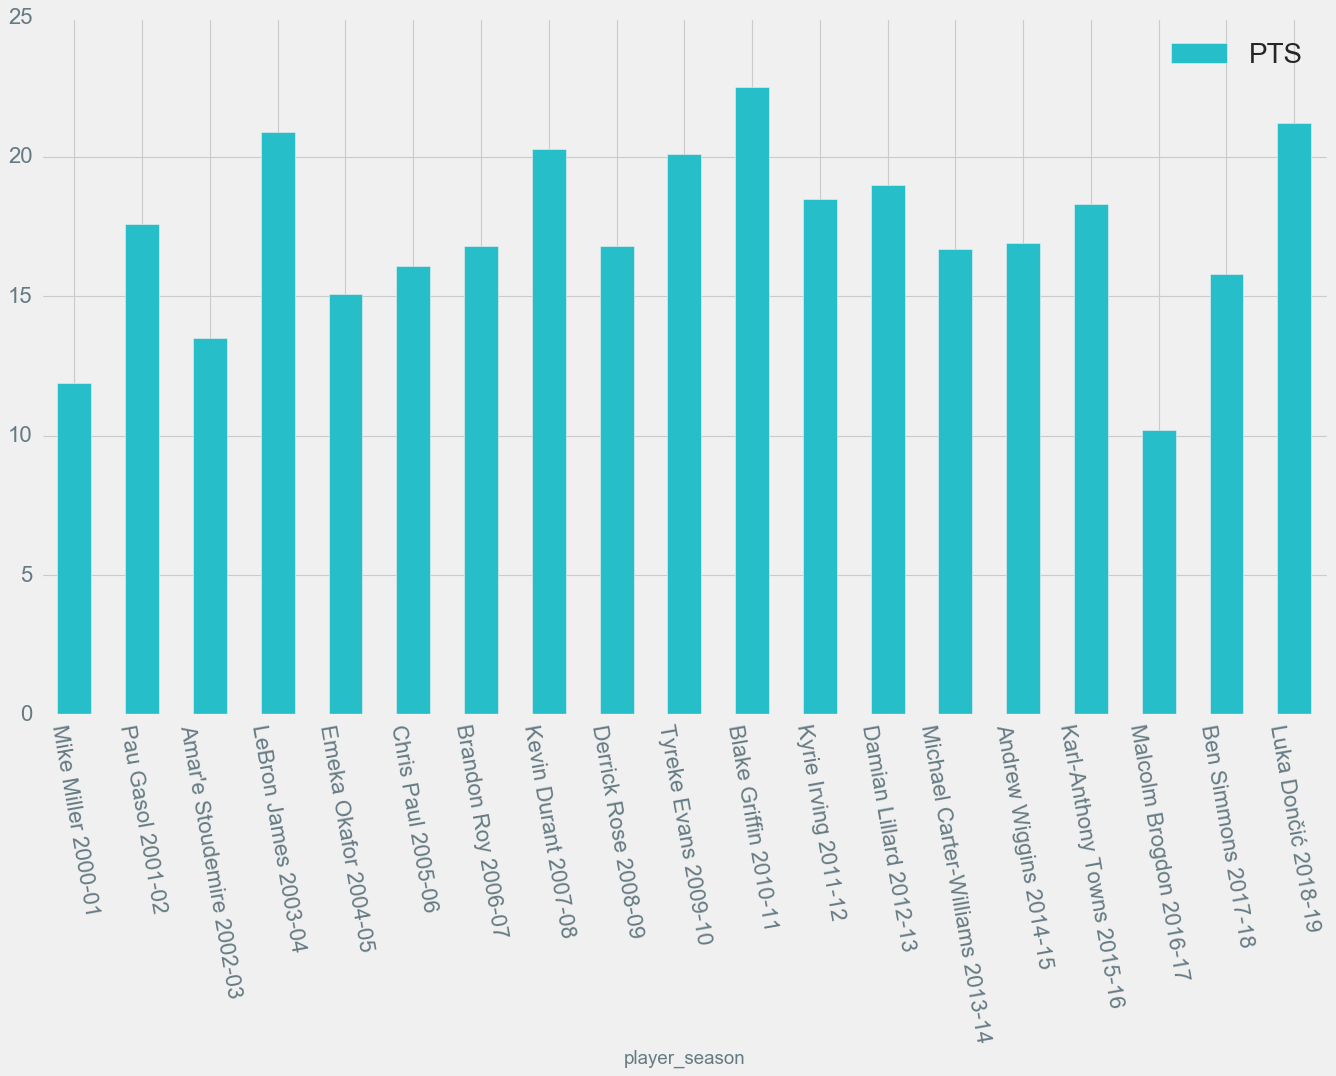

In [225]:
roy_00to19.plot.bar(x = 'player_season', y = 'PTS',color='#26BEC9')
plot.xticks(rotation=280)
plot.gca().invert_xaxis()
fig = plot.gcf()
fig.set_size_inches(18.5, 10.5)
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)
plot.legend(loc = 0, prop = {'size':25})

In [132]:
roy_00to19['player_season'] = str(roy_00to19['Player'])+str(roy_00to19['Season'])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


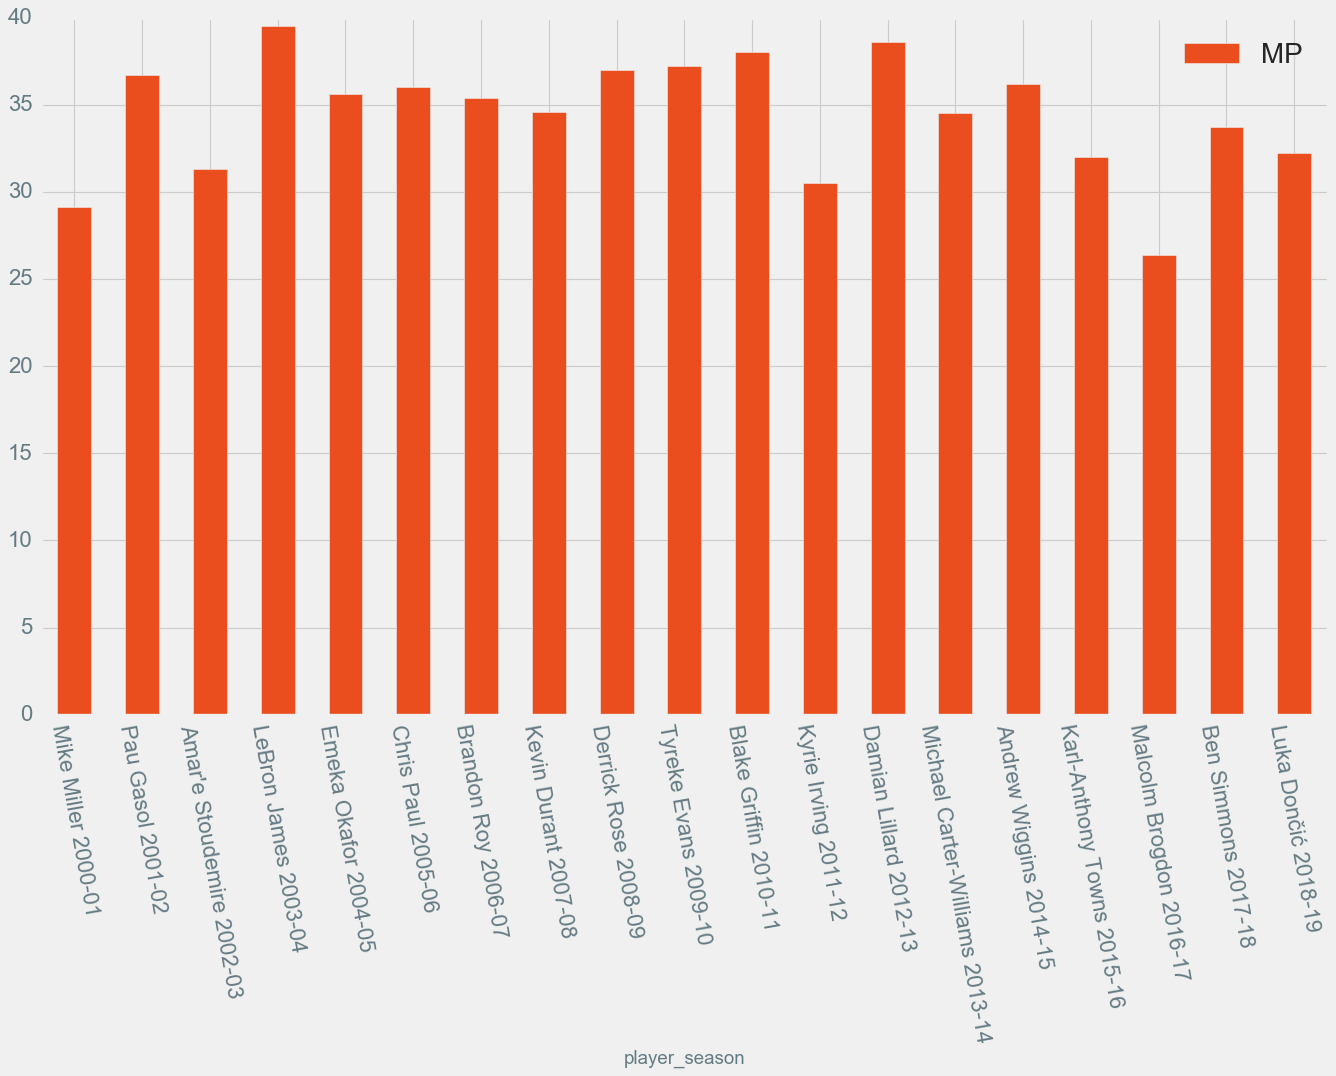

In [224]:
roy_00to19.plot.bar(x = 'player_season', y = 'MP',color='#eb4e1e')
plot.xticks(rotation=280)
plot.gca().invert_xaxis()
fig = plot.gcf()
fig.set_size_inches(18.5, 10.5)
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)
plot.legend(loc = 0, prop = {'size':25})

([<matplotlib.axis.XTick at 0x2e033492c50>,
 <a list of 20 Text xticklabel objects>)

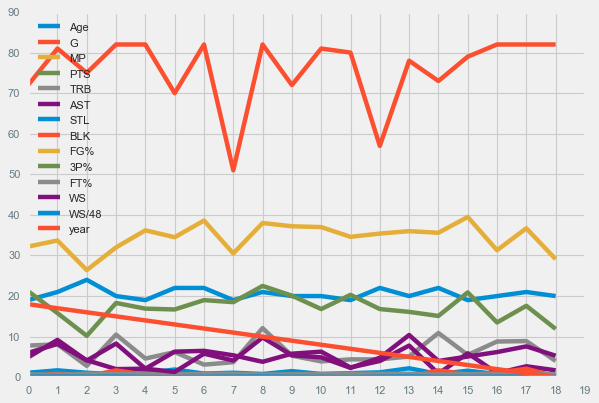

In [174]:
roy_00to19.plot()
plot.xticks(np.arange(20))

In [227]:
reb_ast = roy_00to19.loc[:,['player_season','TRB','AST','STL','BLK','Season']]

In [161]:
import numpy as np

In [228]:
reb_ast

,player_season,TRB,AST,STL,BLK,Season
0,Luka Dončić 2018-19,7.8,6.0,1.1,0.3,2018-19
1,Ben Simmons 2017-18,8.1,8.2,1.7,0.9,2017-18
2,Malcolm Brogdon 2016-17,2.8,4.2,1.1,0.2,2016-17
3,Karl-Anthony Towns 2015-16,10.5,2.0,0.7,1.7,2015-16
4,Andrew Wiggins 2014-15,4.6,2.1,1.0,0.6,2014-15
5,Michael Carter-Williams 2013-14,6.2,6.3,1.9,0.6,2013-14
6,Damian Lillard 2012-13,3.1,6.5,0.9,0.2,2012-13
7,Kyrie Irving 2011-12,3.7,5.4,1.1,0.4,2011-12
8,Blake Griffin 2010-11,12.1,3.8,0.8,0.5,2010-11
9,Tyreke Evans 2009-10,5.3,5.8,1.5,0.4,2009-10


In [236]:
reversed_reb_ast = reb_ast.iloc[::-1]

In [237]:
reversed_reb_ast = reversed_reb_ast.reset_index()

In [238]:
reversed_reb_ast=reversed_reb_ast.loc[:,['player_season'	,'TRB',	'AST','STL','BLK',	'Season']]

In [208]:
list(reversed_reb_ast['player_season'])

['Mike Miller 2000-01',
 'Pau Gasol 2001-02',
 "Amar'e Stoudemire 2002-03",
 'LeBron James 2003-04',
 'Emeka Okafor 2004-05',
 'Chris Paul 2005-06',
 'Brandon Roy 2006-07',
 'Kevin Durant 2007-08',
 'Derrick Rose 2008-09',
 'Tyreke Evans 2009-10',
 'Blake Griffin 2010-11',
 'Kyrie Irving 2011-12',
 'Damian Lillard 2012-13',
 'Michael Carter-Williams 2013-14',
 'Andrew Wiggins 2014-15',
 'Karl-Anthony Towns 2015-16',
 'Malcolm Brogdon 2016-17',
 'Ben Simmons 2017-18',
 'Luka Dončić 2018-19']

([<matplotlib.axis.XTick at 0x2e043ca83c8>,
 <a list of 20 Text xticklabel objects>)

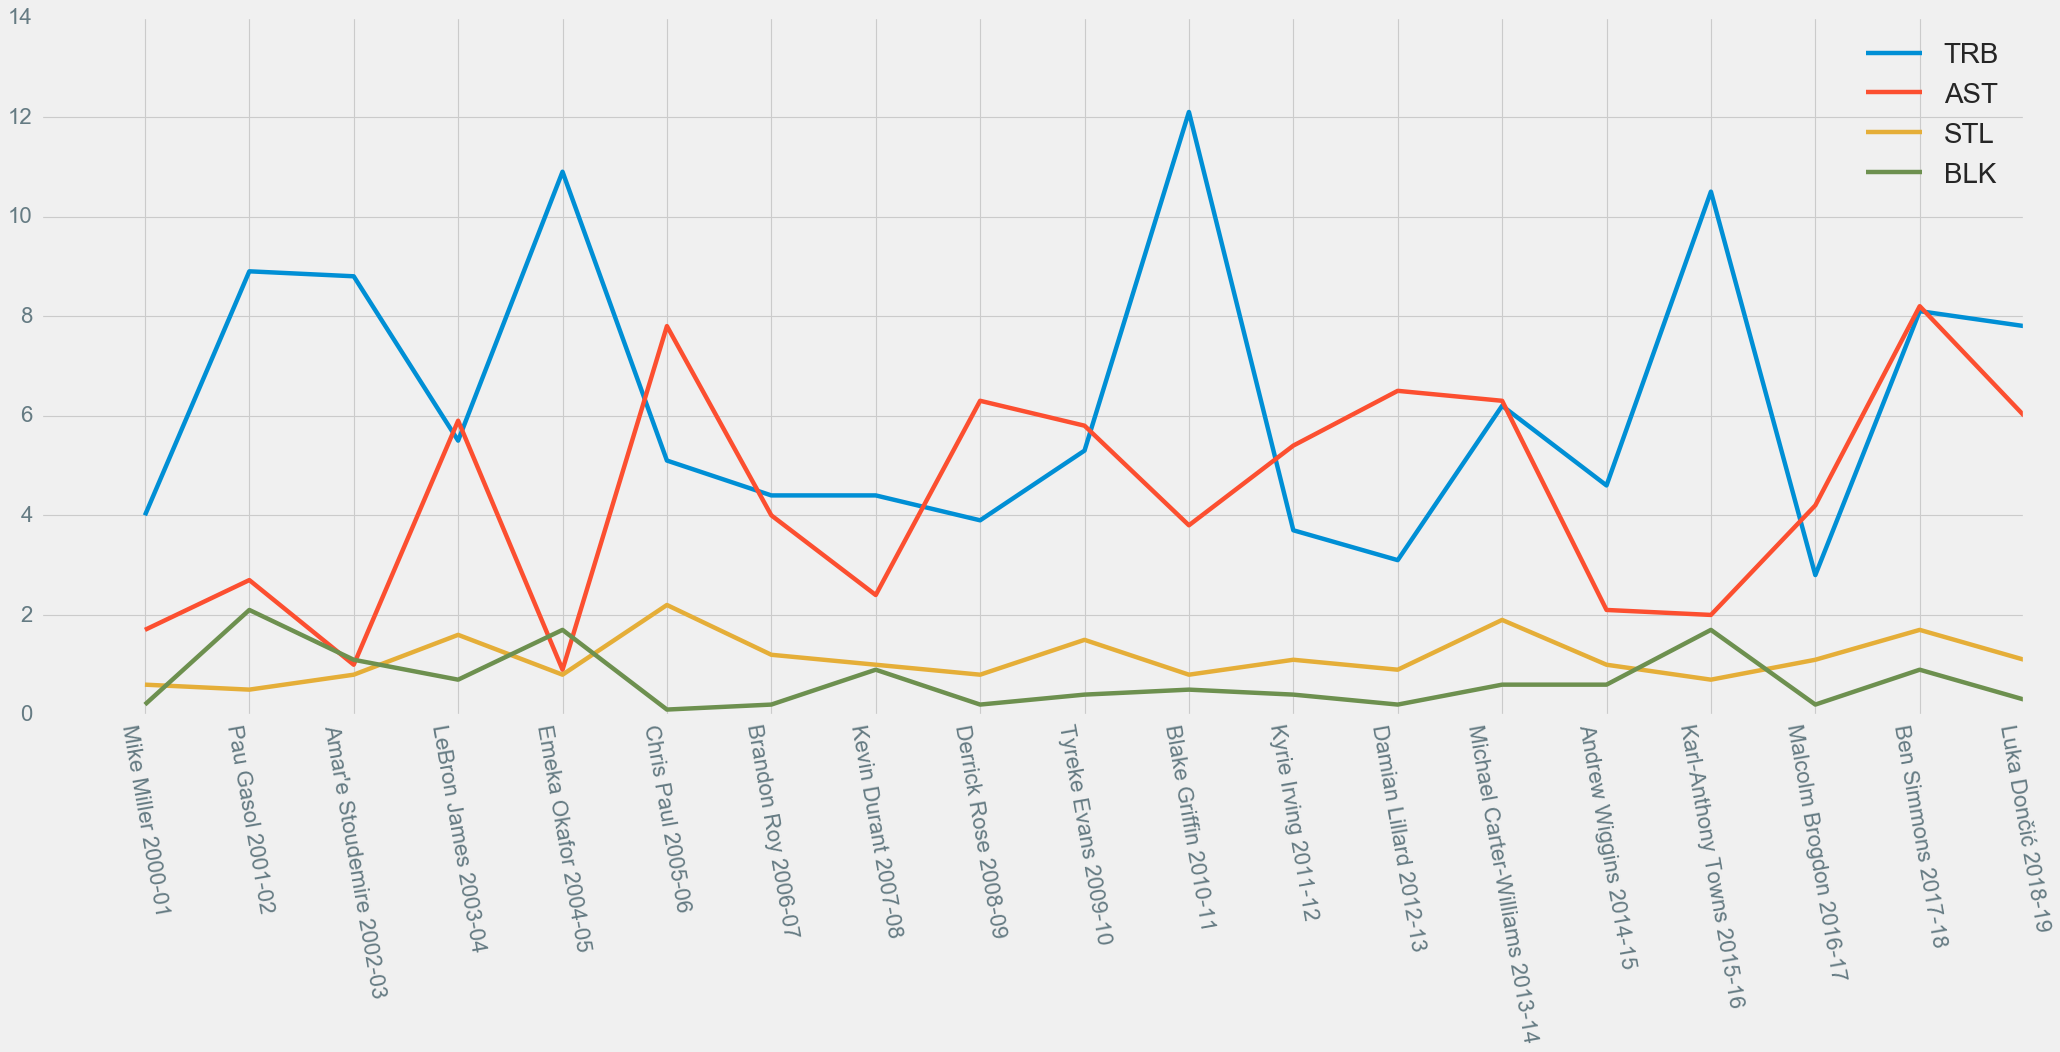

In [239]:
reversed_reb_ast.plot()
plot.xticks(rotation=280)
fig = plot.gcf()
fig.set_size_inches(28.5, 10.5)
# plot.gca().invert_xaxis
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)
plot.legend(loc = 0, prop = {'size':25})
plot.xticks(np.arange(-1,19),('','Mike Miller 2000-01',
 'Pau Gasol 2001-02',
 "Amar'e Stoudemire 2002-03",
 'LeBron James 2003-04',
 'Emeka Okafor 2004-05',
 'Chris Paul 2005-06',
 'Brandon Roy 2006-07',
 'Kevin Durant 2007-08',
 'Derrick Rose 2008-09',
 'Tyreke Evans 2009-10',
 'Blake Griffin 2010-11',
 'Kyrie Irving 2011-12',
 'Damian Lillard 2012-13',
 'Michael Carter-Williams 2013-14',
 'Andrew Wiggins 2014-15',
 'Karl-Anthony Towns 2015-16',
 'Malcolm Brogdon 2016-17',
 'Ben Simmons 2017-18',
 'Luka Dončić 2018-19'))


In [241]:
reb_ast['fp'] = reb_ast['TRB']*1.2 + reb_ast['AST']*1.5 + reb_ast['STL']*3 + reb_ast['BLK']*3 

In [244]:
reb_ast.sort_values('fp',ascending=False)

,player_season,TRB,AST,STL,BLK,Season,fp
1,Ben Simmons 2017-18,8.1,8.2,1.7,0.9,2017-18,29.82
13,Chris Paul 2005-06,5.1,7.8,2.2,0.1,2005-06,24.72
5,Michael Carter-Williams 2013-14,6.2,6.3,1.9,0.6,2013-14,24.39
8,Blake Griffin 2010-11,12.1,3.8,0.8,0.5,2010-11,24.12
3,Karl-Anthony Towns 2015-16,10.5,2.0,0.7,1.7,2015-16,22.80
0,Luka Dončić 2018-19,7.8,6.0,1.1,0.3,2018-19,22.56
17,Pau Gasol 2001-02,8.9,2.7,0.5,2.1,2001-02,22.53
15,LeBron James 2003-04,5.5,5.9,1.6,0.7,2003-04,22.35
14,Emeka Okafor 2004-05,10.9,0.9,0.8,1.7,2004-05,21.93
9,Tyreke Evans 2009-10,5.3,5.8,1.5,0.4,2009-10,20.76


In [246]:
6.2*1.2+6.3*1.5+1.9*3+0.6*3

24.39

In [247]:
roy_00to19

,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,...,STL,BLK,FG%,3P%,FT%,WS,WS/48,year,player_season,Player_Season
0,2018-19,NBA,Luka Dončić,(V),19,DAL,72,32.2,21.2,7.8,...,1.1,0.3,0.427,0.327,0.713,4.9,0.101,18,Luka Dončić 2018-19,Luka Dončić2018-19
1,2017-18,NBA,Ben Simmons,(V),21,PHI,81,33.7,15.8,8.1,...,1.7,0.9,0.545,0.000,0.560,9.2,0.162,17,Ben Simmons 2017-18,Ben Simmons2017-18
2,2016-17,NBA,Malcolm Brogdon,(V),24,MIL,75,26.4,10.2,2.8,...,1.1,0.2,0.457,0.404,0.865,4.1,0.100,16,Malcolm Brogdon 2016-17,Malcolm Brogdon2016-17
3,2015-16,NBA,Karl-Anthony Towns,(V),20,MIN,82,32.0,18.3,10.5,...,0.7,1.7,0.542,0.341,0.811,8.3,0.151,15,Karl-Anthony Towns 2015-16,Karl-Anthony Towns2015-16
4,2014-15,NBA,Andrew Wiggins,(V),19,MIN,82,36.2,16.9,4.6,...,1.0,0.6,0.437,0.310,0.760,2.1,0.034,14,Andrew Wiggins 2014-15,Andrew Wiggins2014-15
5,2013-14,NBA,Michael Carter-Williams,(V),22,PHI,70,34.5,16.7,6.2,...,1.9,0.6,0.405,0.264,0.703,1.3,0.026,13,Michael Carter-Williams 2013-14,Michael Carter-Williams2013-14
6,2012-13,NBA,Damian Lillard,(V),22,POR,82,38.6,19.0,3.1,...,0.9,0.2,0.429,0.368,0.844,5.8,0.088,12,Damian Lillard 2012-13,Damian Lillard2012-13
7,2011-12,NBA,Kyrie Irving,(V),19,CLE,51,30.5,18.5,3.7,...,1.1,0.4,0.469,0.399,0.872,4.1,0.125,11,Kyrie Irving 2011-12,Kyrie Irving2011-12
8,2010-11,NBA,Blake Griffin,(V),21,LAC,82,38.0,22.5,12.1,...,0.8,0.5,0.506,0.292,0.642,9.8,0.152,10,Blake Griffin 2010-11,Blake Griffin2010-11
9,2009-10,NBA,Tyreke Evans,(V),20,SAC,72,37.2,20.1,5.3,...,1.5,0.4,0.458,0.255,0.748,5.4,0.097,9,Tyreke Evans 2009-10,Tyreke Evans2009-10


In [259]:
percentage = roy_00to19.loc[:,['player_season','FG%','3P%','FT%']]

In [260]:
percentage =percentage.iloc[::-1]

In [261]:
percentage = percentage.reset_index()

In [262]:
percentage = percentage.loc[:,['player_season','FG%','3P%','FT%']]

In [263]:
percentage

,player_season,FG%,3P%,FT%
0,Mike Miller 2000-01,0.436,0.407,0.711
1,Pau Gasol 2001-02,0.518,0.200,0.709
2,Amar'e Stoudemire 2002-03,0.472,0.200,0.661
3,LeBron James 2003-04,0.417,0.290,0.754
4,Emeka Okafor 2004-05,0.447,0.000,0.609
5,Chris Paul 2005-06,0.430,0.282,0.847
6,Brandon Roy 2006-07,0.456,0.377,0.838
7,Kevin Durant 2007-08,0.430,0.288,0.873
8,Derrick Rose 2008-09,0.475,0.222,0.788
9,Tyreke Evans 2009-10,0.458,0.255,0.748


([<matplotlib.axis.XTick at 0x2e043ec6588>,
 <a list of 20 Text xticklabel objects>)

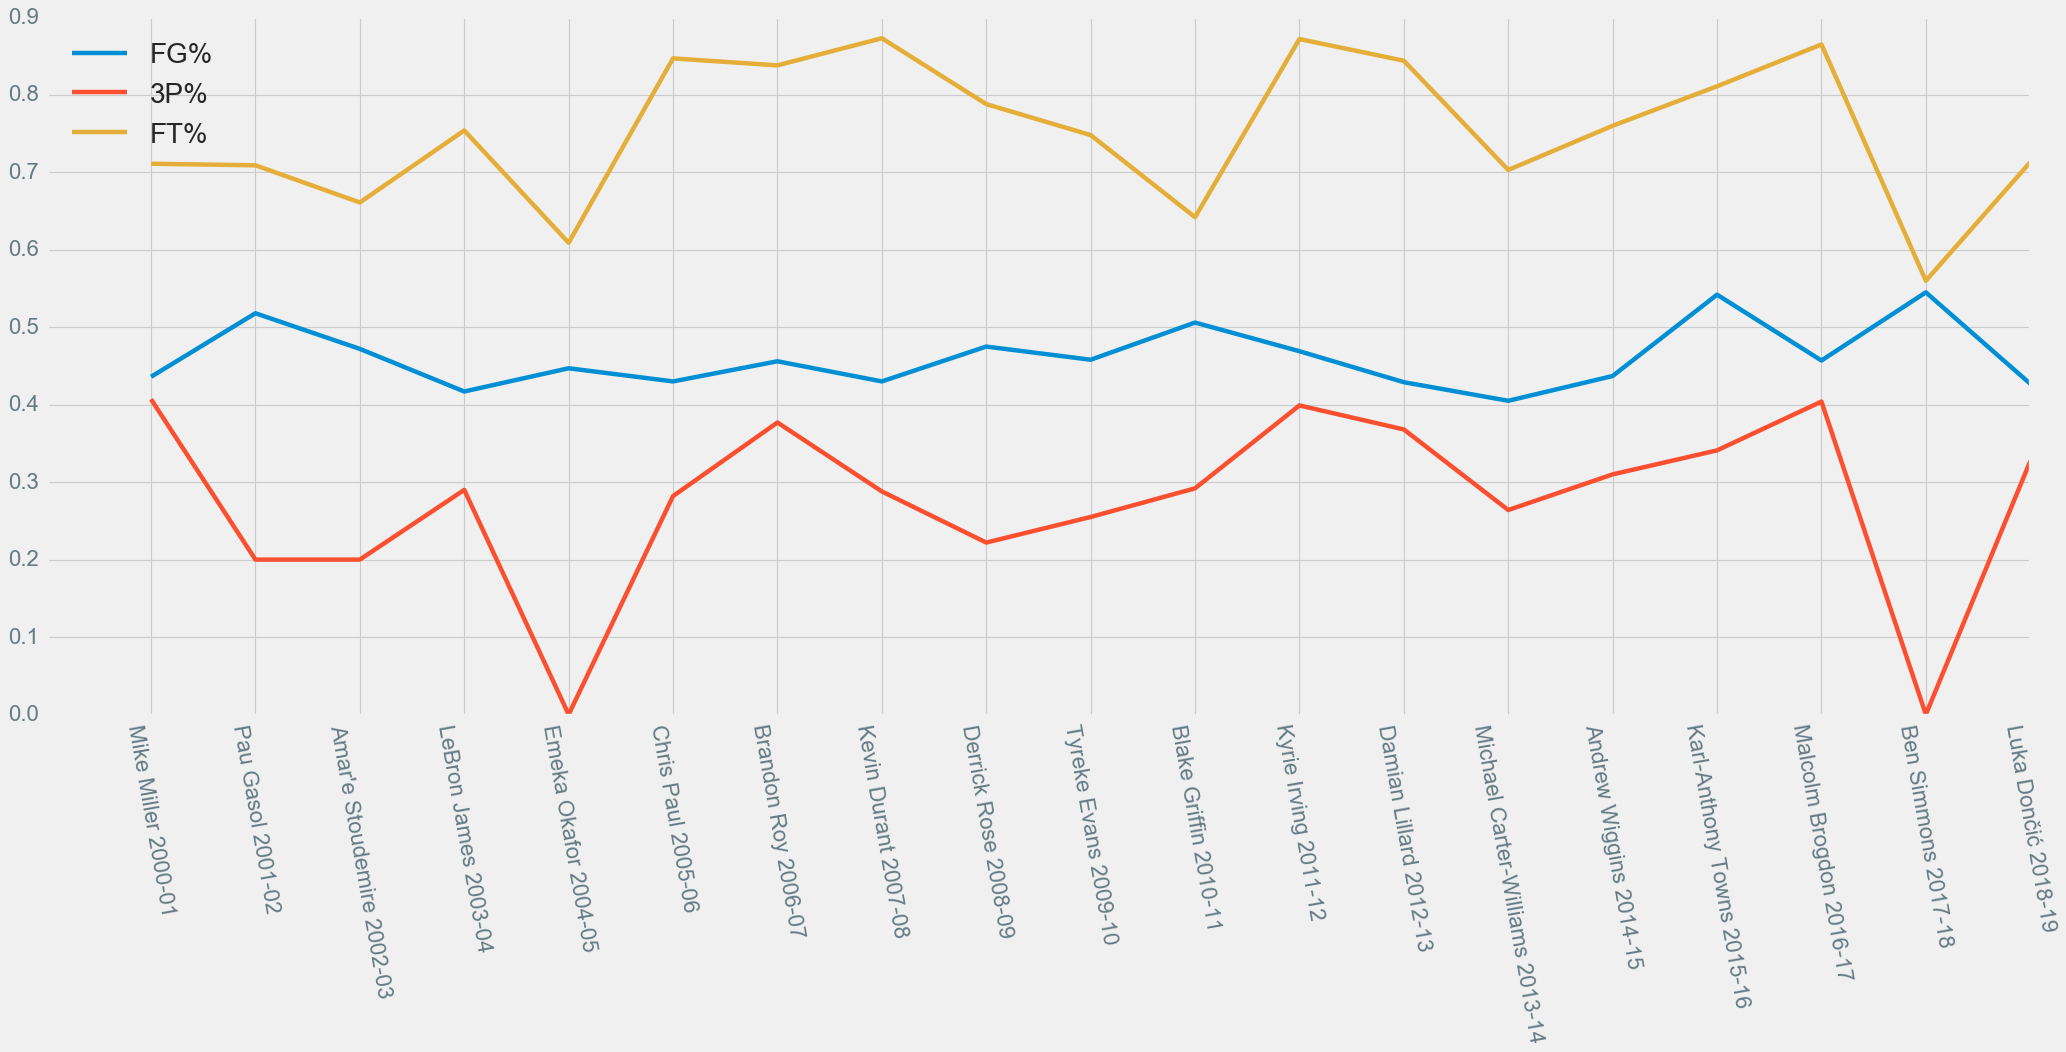

In [265]:
percentage.plot()
plot.xticks(rotation=280)
fig = plot.gcf()
fig.set_size_inches(28.5, 10.5)
# plot.gca().invert_xaxis
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)
plot.legend(loc = 0, prop = {'size':25})
plot.xticks(np.arange(-1,19),('','Mike Miller 2000-01',
 'Pau Gasol 2001-02',
 "Amar'e Stoudemire 2002-03",
 'LeBron James 2003-04',
 'Emeka Okafor 2004-05',
 'Chris Paul 2005-06',
 'Brandon Roy 2006-07',
 'Kevin Durant 2007-08',
 'Derrick Rose 2008-09',
 'Tyreke Evans 2009-10',
 'Blake Griffin 2010-11',
 'Kyrie Irving 2011-12',
 'Damian Lillard 2012-13',
 'Michael Carter-Williams 2013-14',
 'Andrew Wiggins 2014-15',
 'Karl-Anthony Towns 2015-16',
 'Malcolm Brogdon 2016-17',
 'Ben Simmons 2017-18',
 'Luka Dončić 2018-19'))

In [267]:
(427+327*1.5)/2

458.75

In [268]:
from selenium import webdriver

In [299]:
ts_dic={}
for player in roy_00to19['Player']:
    driver = webdriver.Chrome()
    driver.get('https://www.basketball-reference.com/')
    name_input = driver.find_element_by_name('search')
    name_input.send_keys(player)
    go_search = driver.find_element_by_class_name('ac-suggestion')
    go_search.click()
    htmltext = driver.page_source
    driver.close()
    soup = BeautifulSoup(htmltext,'html.parser')
    ts = soup.find(name='td',attrs={"data-stat":"ts_pct"}).get_text()
    ts = float(ts)
    ts_dic[player] = ts

In [300]:
ts_dic

{'Luka Dončić': 0.545,
 'Ben Simmons': 0.557,
 'Malcolm Brogdon': 0.555,
 'Karl-Anthony Towns': 0.59,
 'Andrew Wiggins': 0.517,
 'Michael Carter-Williams': 0.48,
 'Damian Lillard': 0.546,
 'Kyrie Irving': 0.566,
 'Blake Griffin': 0.549,
 'Tyreke Evans': 0.529,
 'Derrick Rose': 0.516,
 'Kevin Durant': 0.519,
 'Brandon Roy': 0.548,
 'Chris Paul': 0.546,
 'Emeka Okafor': 0.479,
 'LeBron James': 0.488,
 "Amar'e Stoudemire": 0.53,
 'Pau Gasol': 0.566,
 'Mike Miller': 0.541}

In [326]:
ts = roy_00to19.loc[:,['Player','Season']]

In [327]:
ts = ts.iloc[::-1]

In [328]:
ts = ts.reset_index()

In [329]:
ts['TS'] = ts['Player'].apply(lambda x :ts_dic[x])

In [330]:
ts['player_season'] = ts['Player']+ts['Season']

In [339]:
ts.sort_values('TS',ascending=False)

,index,Player,Season,TS,player_season
15,3,Karl-Anthony Towns,2015-16,0.590,Karl-Anthony Towns2015-16
11,7,Kyrie Irving,2011-12,0.566,Kyrie Irving2011-12
1,17,Pau Gasol,2001-02,0.566,Pau Gasol2001-02
17,1,Ben Simmons,2017-18,0.557,Ben Simmons2017-18
16,2,Malcolm Brogdon,2016-17,0.555,Malcolm Brogdon2016-17
10,8,Blake Griffin,2010-11,0.549,Blake Griffin2010-11
6,12,Brandon Roy,2006-07,0.548,Brandon Roy2006-07
5,13,Chris Paul,2005-06,0.546,Chris Paul2005-06
12,6,Damian Lillard,2012-13,0.546,Damian Lillard2012-13
18,0,Luka Dončić,2018-19,0.545,Luka Dončić2018-19


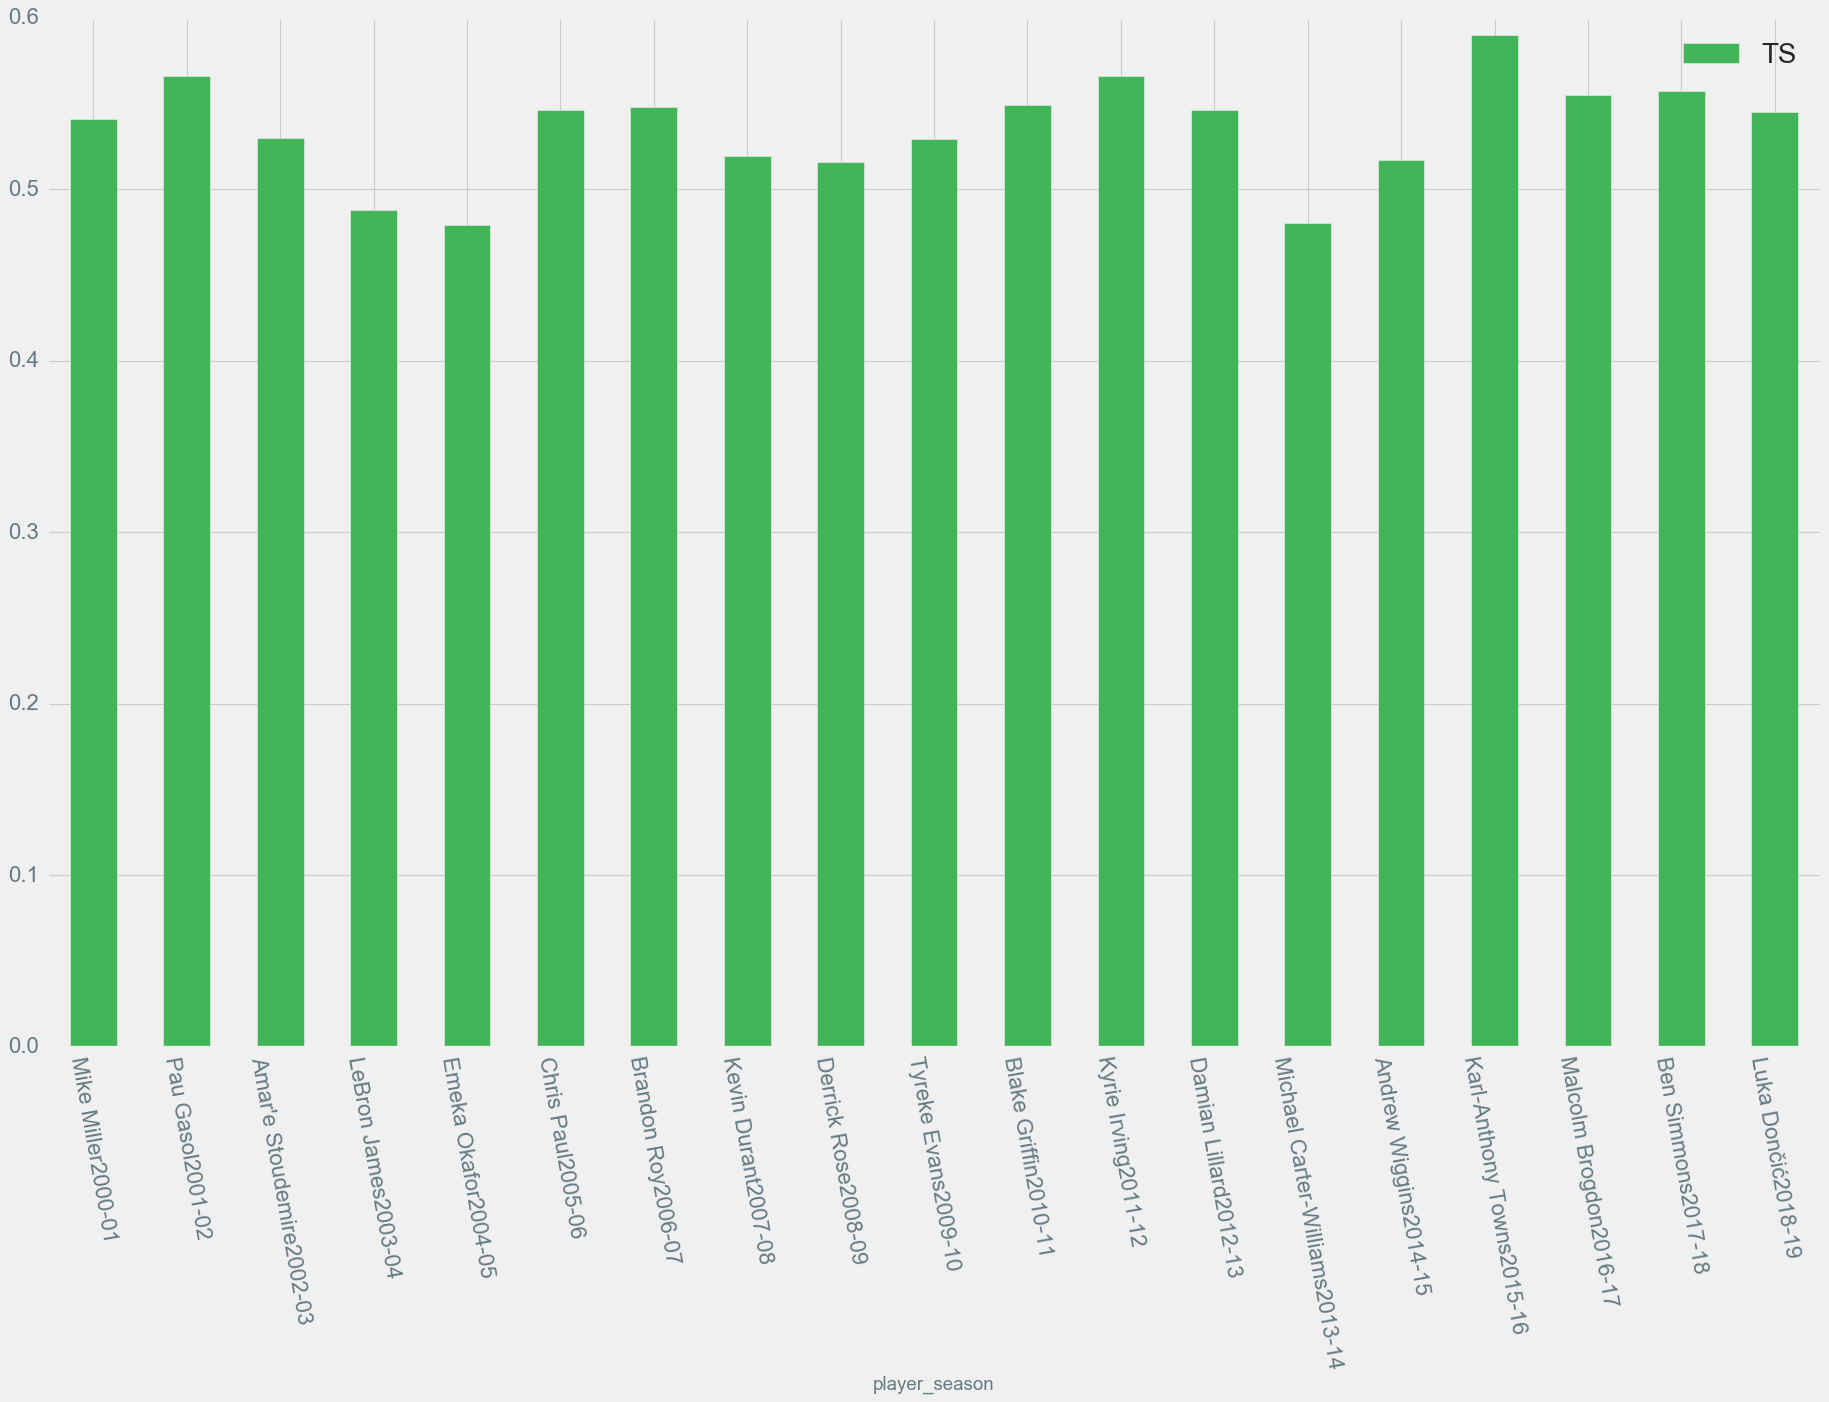

In [338]:
ts.plot.bar(x = 'player_season',y = 'TS', color="#43b558")
plot.xticks(rotation=280)
# plot.gca().invert_xaxis()
fig = plot.gcf()
fig.set_size_inches(25.5, 15.5)
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)
plot.legend(loc = 0, prop = {'size':25})

In [319]:
ts.sort_values('TS',ascending=False)

,index,Player,TS
15,3,Karl-Anthony Towns,0.590
11,7,Kyrie Irving,0.566
1,17,Pau Gasol,0.566
17,1,Ben Simmons,0.557
16,2,Malcolm Brogdon,0.555
10,8,Blake Griffin,0.549
6,12,Brandon Roy,0.548
5,13,Chris Paul,0.546
12,6,Damian Lillard,0.546
18,0,Luka Dončić,0.545


In [413]:
team_list = list(roy_00to19['Tm'])

In [424]:
record_dic = {}

In [517]:
record_dic2 = {}

In [452]:
year = 2019
for team in team_list:
    web = requests.get('https://www.basketball-reference.com/leagues/NBA_'+str(year)+'.html')
    content = web.content
    soup = BeautifulSoup(content,'html.parser')
    html = soup.find(name = 'div',attrs={'id':'all_standings'})
    east = pd.read_html(str(html))[0]
    west = pd.read_html(str(html))[1]
    east.columns = ['team','W',	'L',	'PA/G',	'PS/G',	'SRS',	'Wa',	'W/L%']
    west.columns = ['team','W',	'L',	'PA/G',	'PS/G',	'SRS',	'Wa',	'W/L%']
    allarea = pd.concat([east,west])
    allarea['shortname'] = allarea['team'].apply(lambda x : x[0:3].upper())
    record = str(allarea[allarea['shortname'] == team]['W'].max())+'/'+str(allarea[allarea['shortname'] == team]['L'].max())
    record_dic[year] = record
    year-=1

In [518]:
year = 2018
for team in team_list:
    web = requests.get('https://www.basketball-reference.com/leagues/NBA_'+str(year)+'.html')
    content = web.content
    soup = BeautifulSoup(content,'html.parser')
    html = soup.find(name = 'div',attrs={'id':'all_standings'})
    east = pd.read_html(str(html))[0]
    west = pd.read_html(str(html))[1]
    east.columns = ['team','W',	'L',	'PA/G',	'PS/G',	'SRS',	'Wa',	'W/L%']
    west.columns = ['team','W',	'L',	'PA/G',	'PS/G',	'SRS',	'Wa',	'W/L%']
    allarea = pd.concat([east,west])
    allarea['shortname'] = allarea['team'].apply(lambda x : x[0:3].upper())
    record = str(allarea[allarea['shortname'] == team]['W'].max())+'/'+str(allarea[allarea['shortname'] == team]['L'].max())
    record_dic2[year] = record
    year-=1

In [453]:
record_dic

{2019: '33/49',
 2018: '52/30',
 2017: '42/40',
 2016: '29/53',
 2015: '16/66',
 2014: '19/63',
 2013: '33/49',
 2012: '21/45',
 2011: 'nan/nan',
 2010: '25/57',
 2009: '41/41',
 2008: '20/62',
 2007: '32/50',
 2006: 'nan/nan',
 2005: '18/64',
 2004: '35/47',
 2003: '44/38',
 2002: '23/59',
 2001: '43/39'}

In [520]:
team_list

['DAL',
 'PHI',
 'MIL',
 'MIN',
 'MIN',
 'PHI',
 'POR',
 'CLE',
 'LAC',
 'SAC',
 'CHI',
 'SEA',
 'POR',
 'NOK',
 'CHA',
 'CLE',
 'PHO',
 'MEM',
 'ORL']

In [526]:
record_dic2

{2018: '24/58',
 2017: '28/54',
 2016: '33/49',
 2015: '16/66',
 2014: '40/42',
 2013: '34/48',
 2012: '28/38',
 2011: '19/63',
 2010: '29/53',
 2009: '17/65',
 2008: '33/49',
 2007: '31/51',
 2006: '21/61',
 2005: '18/64',
 2004: 'nan/nan',
 2003: '17/65',
 2002: '36/46',
 2001: '23/59',
 2000: '41/41'}

In [525]:
record_dic2[2005]='18/64'

In [374]:
percentage

,player_season,FG%,3P%,FT%
0,Mike Miller 2000-01,0.436,0.407,0.711
1,Pau Gasol 2001-02,0.518,0.200,0.709
2,Amar'e Stoudemire 2002-03,0.472,0.200,0.661
3,LeBron James 2003-04,0.417,0.290,0.754
4,Emeka Okafor 2004-05,0.447,0.000,0.609
5,Chris Paul 2005-06,0.430,0.282,0.847
6,Brandon Roy 2006-07,0.456,0.377,0.838
7,Kevin Durant 2007-08,0.430,0.288,0.873
8,Derrick Rose 2008-09,0.475,0.222,0.788
9,Tyreke Evans 2009-10,0.458,0.255,0.748


In [373]:
# record = {}

In [375]:
record['Luka Dončić'] = '33/49'

In [389]:
record

{'Luka Dončić': '33/49',
 'Ben Simmons': '52/30',
 'Malcolm Brogdon': '42/40',
 'Karl-Anthony Towns': '29/53',
 'Andrew Wiggins': '16/66',
 'Michael Carter-Williams': '19/63',
 'Damian Lillard': '33/49',
 'Kyrie Irving': '21/45'}

In [388]:
record['Kyrie Irving'] = '21/45'

In [455]:
record_dic[2011]='32/50'

In [457]:
record_dic[2006]='38/44'

In [458]:
record_dic

{2019: '33/49',
 2018: '52/30',
 2017: '42/40',
 2016: '29/53',
 2015: '16/66',
 2014: '19/63',
 2013: '33/49',
 2012: '21/45',
 2011: '32/50',
 2010: '25/57',
 2009: '41/41',
 2008: '20/62',
 2007: '32/50',
 2006: '38/44',
 2005: '18/64',
 2004: '35/47',
 2003: '44/38',
 2002: '23/59',
 2001: '43/39'}

In [529]:
record_df = roy_00to19.loc[:,['Season','Player']]

In [530]:
record_df['year'] = record_df['Season'].apply(lambda x : int(x.split('-')[0])+1)
record_df['year2'] = record_df['Season'].apply(lambda x : int(x.split('-')[0]))

In [531]:
record_df['record'] = record_df['year'].apply(lambda x : record_dic[x])
record_df['record2'] = record_df['year2'].apply(lambda x : record_dic2[x])

In [532]:
new_rd = record_df.loc[:,['Player','record','record2']][::-1]

In [533]:
new_rd.columns=['Player','W/L','W/L_Lastyear']

In [534]:
new_rd

,Player,W/L,W/L_Lastyear
18,Mike Miller,43/39,41/41
17,Pau Gasol,23/59,23/59
16,Amar'e Stoudemire,44/38,36/46
15,LeBron James,35/47,17/65
14,Emeka Okafor,18/64,nan/nan
13,Chris Paul,38/44,18/64
12,Brandon Roy,32/50,21/61
11,Kevin Durant,20/62,31/51
10,Derrick Rose,41/41,33/49
9,Tyreke Evans,25/57,17/65


In [475]:
player_list = list(new_rd['Player'])

In [476]:
player_list

['Mike Miller',
 'Pau Gasol',
 "Amar'e Stoudemire",
 'LeBron James',
 'Emeka Okafor',
 'Chris Paul',
 'Brandon Roy',
 'Kevin Durant',
 'Derrick Rose',
 'Tyreke Evans',
 'Blake Griffin',
 'Kyrie Irving',
 'Damian Lillard',
 'Michael Carter-Williams',
 'Andrew Wiggins',
 'Karl-Anthony Towns',
 'Malcolm Brogdon',
 'Ben Simmons',
 'Luka Dončić']

In [506]:
draft_dic={}
year = 2000
for player in player_list:
    web = requests.get('https://www.basketball-reference.com/draft/NBA_'+str(year)+'.html')
    content = web.content
    soup = BeautifulSoup(content,'html.parser')
    html = soup.find(name='div',attrs={'class':'table_outer_container'})
    draft_data = pd.read_html(str(html))[0]
    temp=[]
    for i in draft_data.columns[1:4]:
        temp.append(i)
    draft_data = draft_data.loc[:,temp]
    draft_data.columns=['rank','team','player']
    rank = draft_data[draft_data['player'] == player]['rank'].max()
    draft_dic[player] = rank
    year+=1

In [513]:
draft_dic

{'Mike Miller': '5',
 'Pau Gasol': '3',
 "Amar'e Stoudemire": '9',
 'LeBron James': '1',
 'Emeka Okafor': '2',
 'Chris Paul': '4',
 'Brandon Roy': '6',
 'Kevin Durant': '2',
 'Derrick Rose': '1',
 'Tyreke Evans': '4',
 'Blake Griffin': '1',
 'Kyrie Irving': '1',
 'Damian Lillard': '6',
 'Michael Carter-Williams': '11',
 'Andrew Wiggins': '1',
 'Karl-Anthony Towns': '1',
 'Malcolm Brogdon': '36',
 'Ben Simmons': '1',
 'Luka Dončić': '3'}

In [512]:
draft_dic['Ben Simmons'] = '1'

In [535]:
new_rd['Draft'] = new_rd['Player'].apply(lambda x : draft_dic[x])

In [536]:
new_rd

,Player,W/L,W/L_Lastyear,Draft
18,Mike Miller,43/39,41/41,5
17,Pau Gasol,23/59,23/59,3
16,Amar'e Stoudemire,44/38,36/46,9
15,LeBron James,35/47,17/65,1
14,Emeka Okafor,18/64,nan/nan,2
13,Chris Paul,38/44,18/64,4
12,Brandon Roy,32/50,21/61,6
11,Kevin Durant,20/62,31/51,2
10,Derrick Rose,41/41,33/49,1
9,Tyreke Evans,25/57,17/65,4


In [537]:
percentage

,player_season,FG%,3P%,FT%
0,Mike Miller 2000-01,0.436,0.407,0.711
1,Pau Gasol 2001-02,0.518,0.200,0.709
2,Amar'e Stoudemire 2002-03,0.472,0.200,0.661
3,LeBron James 2003-04,0.417,0.290,0.754
4,Emeka Okafor 2004-05,0.447,0.000,0.609
5,Chris Paul 2005-06,0.430,0.282,0.847
6,Brandon Roy 2006-07,0.456,0.377,0.838
7,Kevin Durant 2007-08,0.430,0.288,0.873
8,Derrick Rose 2008-09,0.475,0.222,0.788
9,Tyreke Evans 2009-10,0.458,0.255,0.748


In [538]:
web = requests.get('https://www.basketball-reference.com/draft/NBA_2019.html')

In [539]:
content = web.content

In [540]:
soup = BeautifulSoup(content,'html.parser')

In [542]:
html = soup.find(name='div',attrs={"id":"div_stats"})

In [545]:
rookies = pd.read_html(str(html))[0]

In [555]:
temp = []
for i in rookies.columns:
    temp.append(i)

In [563]:
col=[]
for i in temp:
    col.append(str(i).split(',')[1][2:-2])

In [565]:
rookies.columns=col

In [567]:
pd.options.display.max_columns = 50000

In [573]:
rookies = rookies.dropna()

In [580]:
rookies = rookies[rookies['Player'] != 'Player']

In [582]:
rookies['G'] = rookies['G'].astype(int)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [598]:
roy_00to19['G'].mean()

75.94736842105263

In [599]:
75/82

0.9146341463414634

In [604]:
top_rookies = rookies[rookies['G']>=48]

In [608]:
top_rookies.loc[:,['Player','G']]

,Player,G
1,Ja Morant,48
3,De'Andre Hunter,53
4,Darius Garland,53
5,Jarrett Culver,52
6,Coby White,55
7,Jaxson Hayes,52
9,Cam Reddish,48
21,Grant Williams,52
27,Jordan Poole,48
42,Eric Paschall,50


In [609]:
rookies_ts_dic={}
for player in top_rookies['Player']:
    driver = webdriver.Chrome()
    driver.get('https://www.basketball-reference.com/')
    name_input = driver.find_element_by_name('search')
    name_input.send_keys(player)
    go_search = driver.find_element_by_class_name('ac-suggestion')
    go_search.click()
    htmltext = driver.page_source
    driver.close()
    soup = BeautifulSoup(htmltext,'html.parser')
    ts = soup.find(name='td',attrs={"data-stat":"ts_pct"}).get_text()
    ts = float(ts)
    rookies_ts_dic[player] = ts

In [610]:
rookies_ts_dic

{'Ja Morant': 0.568,
 "De'Andre Hunter": 0.516,
 'Darius Garland': 0.494,
 'Jarrett Culver': 0.449,
 'Coby White': 0.477,
 'Jaxson Hayes': 0.677,
 'Cam Reddish': 0.467,
 'Grant Williams': 0.528,
 'Jordan Poole': 0.42,
 'Eric Paschall': 0.554}

In [613]:
rookies

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
0,1,1,NOP,Zion Williamson,Duke,1,10,274,221,75,22,.576,.364,.654,27.4,22.1,7.5,2.2,0.9,.153,0.5,0.2
1,2,2,MEM,Ja Morant,Murray State,1,48,1435,846,170,340,.493,.358,.783,29.9,17.6,3.5,7.1,2.8,.095,-0.4,0.6
2,3,3,NYK,RJ Barrett,Duke,1,45,1372,614,229,109,.388,.318,.611,30.5,13.6,5.1,2.4,-0.5,-.019,-4.3,-0.8
3,4,4,LAL,De'Andre Hunter,Virginia,1,53,1674,647,210,96,.410,.345,.759,31.6,12.2,4.0,1.8,-0.1,-.003,-4.4,-1.0
4,5,5,CLE,Darius Garland,Vanderbilt,1,53,1616,648,100,204,.394,.352,.870,30.5,12.2,1.9,3.8,-1.5,-.043,-6.0,-1.6
5,6,6,PHO,Jarrett Culver,Texas Tech,1,52,1268,472,176,94,.388,.277,.465,24.4,9.1,3.4,1.8,-0.3,-.012,-3.4,-0.4
6,7,7,CHI,Coby White,UNC,1,55,1337,612,192,132,.370,.338,.747,24.3,11.1,3.5,2.4,0.1,.005,-4.4,-0.8
7,8,8,ATL,Jaxson Hayes,Texas,1,52,928,412,222,50,.664,.250,.626,17.8,7.9,4.3,1.0,3.4,.176,1.8,0.9
8,9,9,WAS,Rui Hachimura,Gonzaga,1,30,864,416,179,46,.487,.236,.826,28.8,13.9,6.0,1.5,1.1,.063,-3.5,-0.3
9,10,10,ATL,Cam Reddish,Duke,1,48,1247,446,179,74,.353,.316,.788,26.0,9.3,3.7,1.5,-0.9,-.033,-5.1,-1.0


In [616]:
driver = webdriver.Chrome()
driver.get('https://www.basketball-reference.com/')
name_input = driver.find_element_by_name('search')
name_input.send_keys('Zion Williamson')
go_search = driver.find_element_by_class_name('ac-suggestion')
go_search.click()
htmltext = driver.page_source
driver.close()
soup = BeautifulSoup(htmltext,'html.parser')
ts = soup.find(name='td',attrs={"data-stat":"ts_pct"}).get_text()
ts = float(ts)
rookies_ts_dic['Zion Williamson'] = ts

In [617]:
rookies_ts_dic

{'Ja Morant': 0.568,
 "De'Andre Hunter": 0.516,
 'Darius Garland': 0.494,
 'Jarrett Culver': 0.449,
 'Coby White': 0.477,
 'Jaxson Hayes': 0.677,
 'Cam Reddish': 0.467,
 'Grant Williams': 0.528,
 'Jordan Poole': 0.42,
 'Eric Paschall': 0.62,
 'Zion Williamson': 0.62}

In [618]:
rookies_ts = pd.DataFrame(rookies_ts_dic.items())

In [622]:
rookies_ts.columns=['Player','TS%']

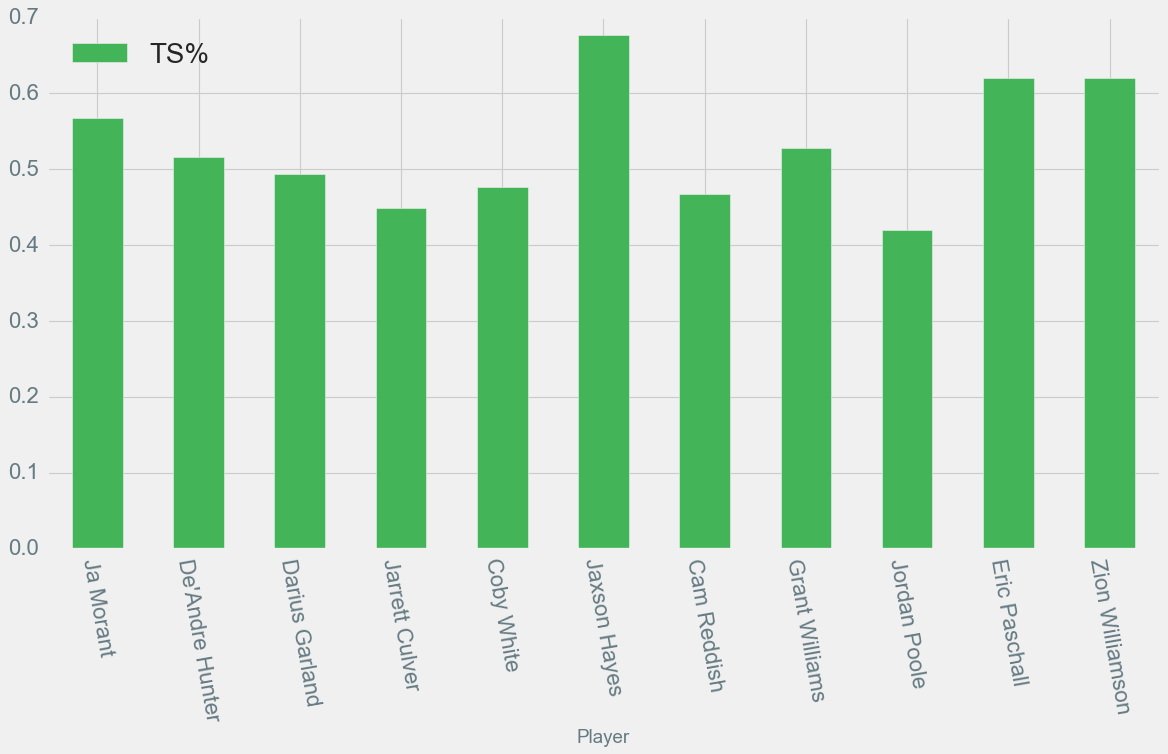

In [675]:
rookies_ts.plot.bar(x = 'Player',y = 'TS%', color="#43b558")
plot.xticks(rotation=280)
# plot.gca().invert_xaxis()
fig = plot.gcf()
fig.set_size_inches(16,8)
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)
plot.legend(loc = 0, prop = {'size':25})

In [651]:
zion = rookies.head(1)

In [652]:
top_rookies = pd.concat([top_rookies,zion])

In [655]:
top_rookies['PTS'].astype(float)

,PTS,PTS
1,846.0,17.6
3,647.0,12.2
4,648.0,12.2
5,472.0,9.1
6,612.0,11.1
7,412.0,7.9
9,446.0,9.3
21,197.0,3.8
27,376.0,7.8
42,662.0,13.2


In [658]:
top_rookies.columns = ['Rk', 'Pk', 'Tm', 'Player', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB',
       'AST', 'FG%', '3P%', 'FT%', 'MP', 'PTS_AVG', 'TRB_AVG', 'AST_AVG', 'WS', 'WS/48',
       'BPM', 'VORP']

In [663]:
for i in ['Yrs', 'G', 'MP', 'PTS', 'TRB','AST', 'FG%', '3P%', 'FT%', 'MP', 'PTS_AVG', 'TRB_AVG', 'AST_AVG', 'WS', 'WS/48','BPM', 'VORP']:
    top_rookies[i] = top_rookies[i].astype(float)

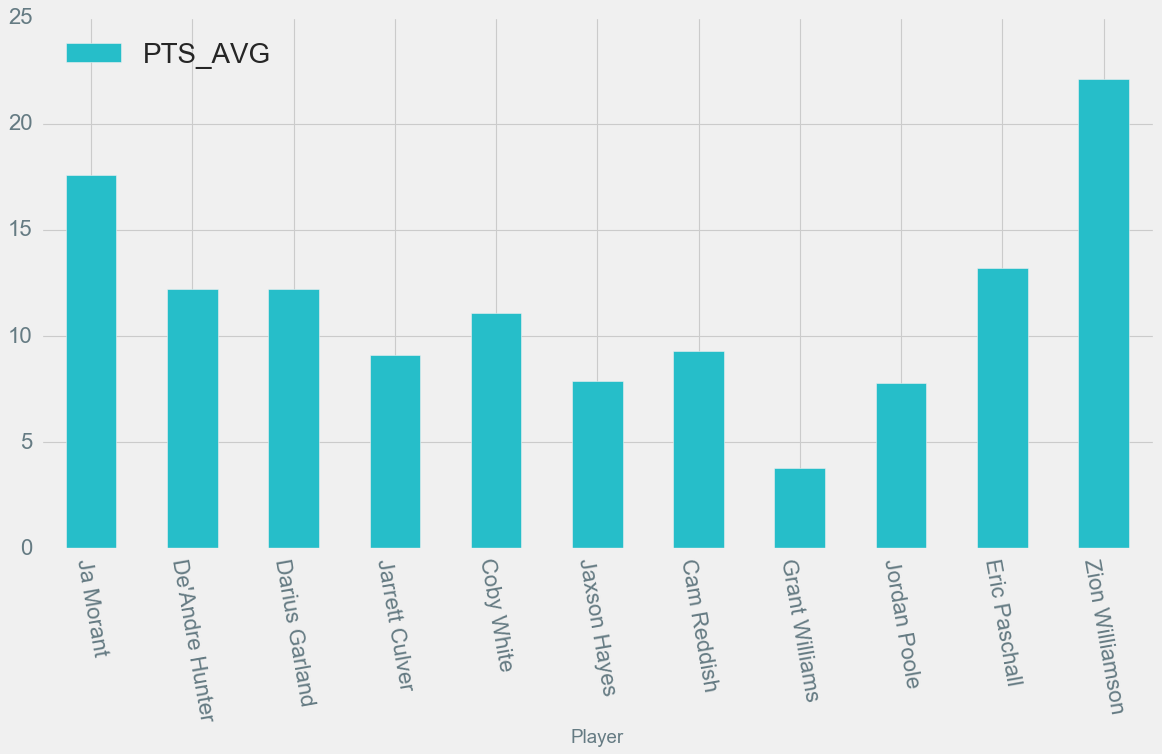

In [683]:
top_rookies.plot.bar(x = 'Player', y = 'PTS_AVG',color='#26BEC9')
plot.xticks(rotation=280)
# plot.gca().invert_xaxis()
fig = plot.gcf()
fig.set_size_inches(16, 8)
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)
plot.legend(loc = 0, prop = {'size':25})

In [676]:
top_rookies

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP,PTS_AVG,TRB_AVG,AST_AVG,WS,WS/48,BPM,VORP
1,2,2,MEM,Ja Morant,Murray State,1.0,48.0,1435.0,846.0,170.0,340.0,0.493,0.358,0.783,29.9,17.6,3.5,7.1,2.8,0.095,-0.4,0.6
3,4,4,LAL,De'Andre Hunter,Virginia,1.0,53.0,1674.0,647.0,210.0,96.0,0.410,0.345,0.759,31.6,12.2,4.0,1.8,-0.1,-0.003,-4.4,-1.0
4,5,5,CLE,Darius Garland,Vanderbilt,1.0,53.0,1616.0,648.0,100.0,204.0,0.394,0.352,0.870,30.5,12.2,1.9,3.8,-1.5,-0.043,-6.0,-1.6
5,6,6,PHO,Jarrett Culver,Texas Tech,1.0,52.0,1268.0,472.0,176.0,94.0,0.388,0.277,0.465,24.4,9.1,3.4,1.8,-0.3,-0.012,-3.4,-0.4
6,7,7,CHI,Coby White,UNC,1.0,55.0,1337.0,612.0,192.0,132.0,0.370,0.338,0.747,24.3,11.1,3.5,2.4,0.1,0.005,-4.4,-0.8
7,8,8,ATL,Jaxson Hayes,Texas,1.0,52.0,928.0,412.0,222.0,50.0,0.664,0.250,0.626,17.8,7.9,4.3,1.0,3.4,0.176,1.8,0.9
9,10,10,ATL,Cam Reddish,Duke,1.0,48.0,1247.0,446.0,179.0,74.0,0.353,0.316,0.788,26.0,9.3,3.7,1.5,-0.9,-0.033,-5.1,-1.0
21,22,22,BOS,Grant Williams,Tennessee,1.0,52.0,809.0,197.0,138.0,55.0,0.430,0.286,0.714,15.6,3.8,2.7,1.1,1.4,0.082,-0.1,0.4
27,28,28,GSW,Jordan Poole,Michigan,1.0,48.0,1033.0,376.0,98.0,95.0,0.295,0.265,0.839,21.5,7.8,2.0,2.0,-1.3,-0.062,-7.5,-1.4
42,41,41,GSW,Eric Paschall,Villanova,1.0,50.0,1334.0,662.0,234.0,85.0,0.482,0.282,0.774,26.7,13.2,4.7,1.7,1.4,0.049,-3.8,-0.6


In [678]:
top_rookies['FP'] = top_rookies['TRB_AVG']*1.2+top_rookies['AST_AVG']*1.5

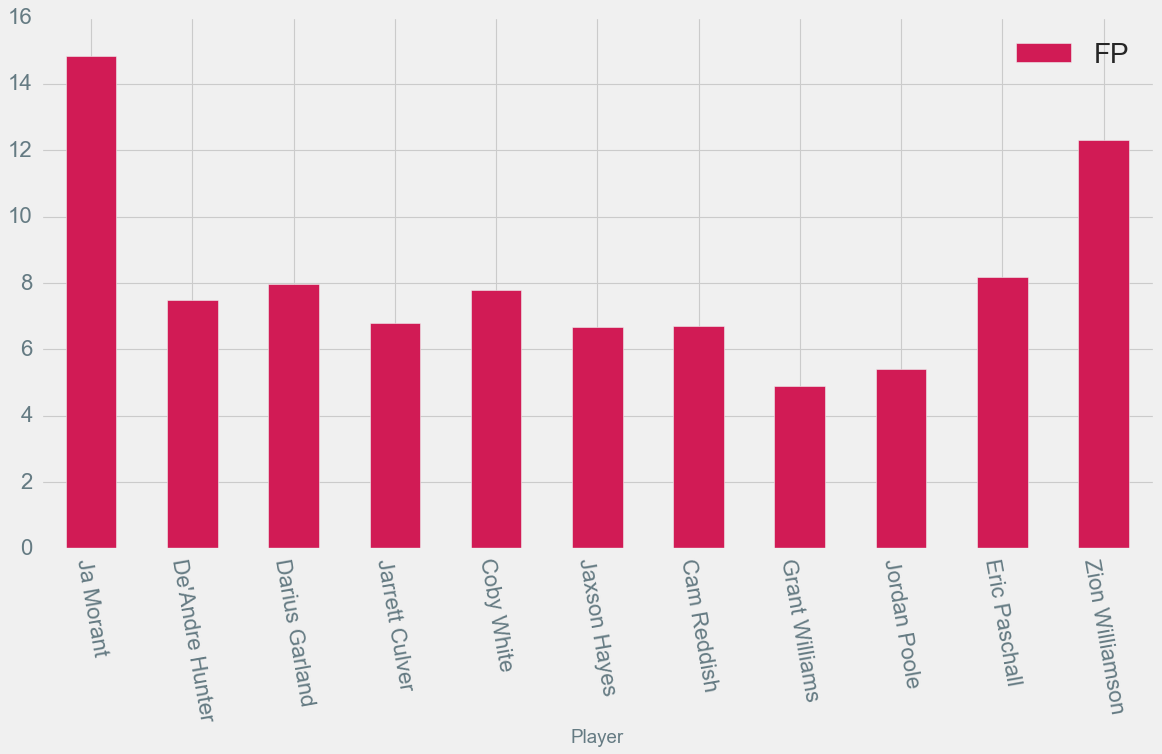

In [684]:
top_rookies.plot.bar(x = 'Player', y = 'FP',color='#d11b55')
plot.xticks(rotation=280)
# plot.gca().invert_xaxis()
fig = plot.gcf()
fig.set_size_inches(16, 8)
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)
plot.legend(loc = 0, prop = {'size':25})

In [682]:
top_rookies

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP,PTS_AVG,TRB_AVG,AST_AVG,WS,WS/48,BPM,VORP,FP
1,2,2,MEM,Ja Morant,Murray State,1.0,48.0,1435.0,846.0,170.0,340.0,0.493,0.358,0.783,29.9,17.6,3.5,7.1,2.8,0.095,-0.4,0.6,14.85
3,4,4,LAL,De'Andre Hunter,Virginia,1.0,53.0,1674.0,647.0,210.0,96.0,0.410,0.345,0.759,31.6,12.2,4.0,1.8,-0.1,-0.003,-4.4,-1.0,7.50
4,5,5,CLE,Darius Garland,Vanderbilt,1.0,53.0,1616.0,648.0,100.0,204.0,0.394,0.352,0.870,30.5,12.2,1.9,3.8,-1.5,-0.043,-6.0,-1.6,7.98
5,6,6,PHO,Jarrett Culver,Texas Tech,1.0,52.0,1268.0,472.0,176.0,94.0,0.388,0.277,0.465,24.4,9.1,3.4,1.8,-0.3,-0.012,-3.4,-0.4,6.78
6,7,7,CHI,Coby White,UNC,1.0,55.0,1337.0,612.0,192.0,132.0,0.370,0.338,0.747,24.3,11.1,3.5,2.4,0.1,0.005,-4.4,-0.8,7.80
7,8,8,ATL,Jaxson Hayes,Texas,1.0,52.0,928.0,412.0,222.0,50.0,0.664,0.250,0.626,17.8,7.9,4.3,1.0,3.4,0.176,1.8,0.9,6.66
9,10,10,ATL,Cam Reddish,Duke,1.0,48.0,1247.0,446.0,179.0,74.0,0.353,0.316,0.788,26.0,9.3,3.7,1.5,-0.9,-0.033,-5.1,-1.0,6.69
21,22,22,BOS,Grant Williams,Tennessee,1.0,52.0,809.0,197.0,138.0,55.0,0.430,0.286,0.714,15.6,3.8,2.7,1.1,1.4,0.082,-0.1,0.4,4.89
27,28,28,GSW,Jordan Poole,Michigan,1.0,48.0,1033.0,376.0,98.0,95.0,0.295,0.265,0.839,21.5,7.8,2.0,2.0,-1.3,-0.062,-7.5,-1.4,5.40
42,41,41,GSW,Eric Paschall,Villanova,1.0,50.0,1334.0,662.0,234.0,85.0,0.482,0.282,0.774,26.7,13.2,4.7,1.7,1.4,0.049,-3.8,-0.6,8.19


In [685]:
rookies_ts

,Player,TS%
0,Ja Morant,0.568
1,De'Andre Hunter,0.516
2,Darius Garland,0.494
3,Jarrett Culver,0.449
4,Coby White,0.477
5,Jaxson Hayes,0.677
6,Cam Reddish,0.467
7,Grant Williams,0.528
8,Jordan Poole,0.420
9,Eric Paschall,0.620
